In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the NAMES column from the dataset
charity_df = charity_df.drop(['NAME'], axis=1)
# charity_df = charity_df.drop(['SPECIAL_CONSIDERATIONS'], axis=1)
# charity_df = charity_df.drop(['INCOME_AMT'], axis=1)

In [3]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [4]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Print out the CLASSIFICATION value counts
class_counts = charity_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C1245        1
C1580        1
C1900        1
C1370        1
Name: CLASSIFICATION, Length: 71, dtype: int64

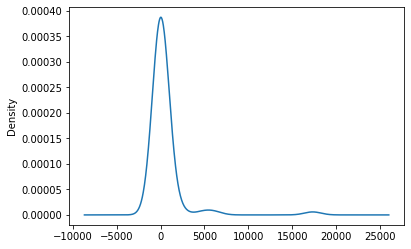

In [6]:
# Visualize the CLASSIFICATION value counts
class_counts.plot.density()

In [7]:
# Determine which values to replace
replace_classification = list(class_counts[class_counts <2000].index)

# Replace in DataFrame
for classification in replace_classification:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification, "Other")

# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [8]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION             4
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [9]:
# Print out the APPLICATION_TYPE value counts
application_counts = charity_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

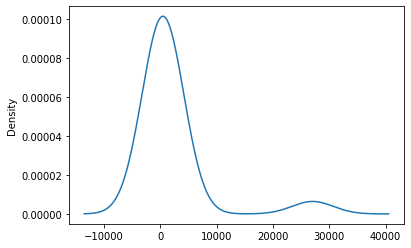

In [10]:
# Visualize the APPLICATION_TYPE counts
application_counts.plot.density()

In [11]:
# Determine which values to replace
replace_application_type = list(application_counts[application_counts <27000].index)

# Replace in DataFrame
for app_type in replace_application_type:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app_type, "Other")

# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

In [17]:
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

In [18]:
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

In [19]:
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [20]:
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 718us/step - loss: 0.6150 - accuracy: 0.6782
Epoch 2/100
804/804 [==============================] - 0s 585us/step - loss: 0.5900 - accuracy: 0.7037
Epoch 3/100
804/804 [==============================] - 0s 585us/step - loss: 0.5855 - accuracy: 0.7065
Epoch 4/100
804/804 [==============================] - 0s 588us/step - loss: 0.5828 - accuracy: 0.7070
Epoch 5/100
804/804 [==============================] - 1s 696us/step - loss: 0.5805 - accuracy: 0.7084
Epoch 6/100
804/804 [==============================] - 1s 688us/step - loss: 0.5794 - accuracy: 0.7090
Epoch 7/100
804/804 [==============================] - 1s 704us/step - loss: 0.5784 - accuracy: 0.7103
Epoch 8/100
804/804 [==============================] - 1s 755us/step - loss: 0.5776 - accuracy: 0.7107
Epoch 9/100
804/804 [==============================] - 1s 775us/step - loss: 0.5767 - accuracy: 0.7119
Epoch 10/100
804/804 [==============================] - 1s 694us/step - l

804/804 [==============================] - 0s 616us/step - loss: 0.5639 - accuracy: 0.7215
Epoch 80/100
804/804 [==============================] - 1s 630us/step - loss: 0.5640 - accuracy: 0.7211
Epoch 81/100
804/804 [==============================] - 1s 630us/step - loss: 0.5639 - accuracy: 0.7212
Epoch 82/100
804/804 [==============================] - 1s 642us/step - loss: 0.5641 - accuracy: 0.7206
Epoch 83/100
804/804 [==============================] - 1s 663us/step - loss: 0.5640 - accuracy: 0.7209
Epoch 84/100
804/804 [==============================] - 1s 628us/step - loss: 0.5637 - accuracy: 0.7224
Epoch 85/100
804/804 [==============================] - 1s 641us/step - loss: 0.5639 - accuracy: 0.7224
Epoch 86/100
804/804 [==============================] - 1s 643us/step - loss: 0.5637 - accuracy: 0.7223
Epoch 87/100
804/804 [==============================] - 1s 687us/step - loss: 0.5637 - accuracy: 0.7210
Epoch 88/100
804/804 [==============================] - 1s 627us/step - loss:

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5803 - accuracy: 0.7064
Loss: 0.5803092122077942, Accuracy: 0.7063556909561157


In [24]:
# Adjust the model for greater accuracy

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

In [25]:
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                1080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 700us/step - loss: 0.6040 - accuracy: 0.6903
Epoch 2/100
804/804 [==============================] - 1s 701us/step - loss: 0.5789 - accuracy: 0.7111
Epoch 3/100
804/804 [==============================] - 1s 725us/step - loss: 0.5767 - accuracy: 0.7127
Epoch 4/100
804/804 [==============================] - 1s 699us/step - loss: 0.5744 - accuracy: 0.7137
Epoch 5/100
804/804 [==============================] - 1s 765us/step - loss: 0.5736 - accuracy: 0.7139
Epoch 6/100
804/804 [==============================] - 1s 674us/step - loss: 0.5721 - accuracy: 0.7147
Epoch 7/100
804/804 [==============================] - 1s 690us/step - loss: 0.5718 - accuracy: 0.7153
Epoch 8/100
804/804 [==============================] - 1s 701us/step - loss: 0.5707 - accuracy: 0.7168
Epoch 9/100
804/804 [==============================] - 1s 722us/step - loss: 0.5701 - accuracy: 0.7160
Epoch 10/100
804/804 [==============================] - 1s 712us/step - l

804/804 [==============================] - 1s 807us/step - loss: 0.5553 - accuracy: 0.7258
Epoch 80/100
804/804 [==============================] - 1s 747us/step - loss: 0.5551 - accuracy: 0.7265
Epoch 81/100
804/804 [==============================] - 1s 735us/step - loss: 0.5549 - accuracy: 0.7264
Epoch 82/100
804/804 [==============================] - 1s 745us/step - loss: 0.5553 - accuracy: 0.7264
Epoch 83/100
804/804 [==============================] - 1s 748us/step - loss: 0.5553 - accuracy: 0.7244
Epoch 84/100
804/804 [==============================] - 1s 705us/step - loss: 0.5550 - accuracy: 0.7262
Epoch 85/100
804/804 [==============================] - 1s 664us/step - loss: 0.5543 - accuracy: 0.7268
Epoch 86/100
804/804 [==============================] - 1s 688us/step - loss: 0.5544 - accuracy: 0.7271
Epoch 87/100
804/804 [==============================] - 1s 681us/step - loss: 0.5540 - accuracy: 0.7259
Epoch 88/100
804/804 [==============================] - 1s 683us/step - loss:

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5806 - accuracy: 0.7131
Loss: 0.5805785655975342, Accuracy: 0.7131195068359375


In [30]:
# Adjust the model for greater accuracy

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

In [31]:
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                1080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 742us/step - loss: 0.5980 - accuracy: 0.6950
Epoch 2/100
804/804 [==============================] - 1s 739us/step - loss: 0.5830 - accuracy: 0.7094
Epoch 3/100
804/804 [==============================] - 1s 746us/step - loss: 0.5798 - accuracy: 0.7116
Epoch 4/100
804/804 [==============================] - 1s 764us/step - loss: 0.5775 - accuracy: 0.7131
Epoch 5/100
804/804 [==============================] - 1s 747us/step - loss: 0.5761 - accuracy: 0.7121
Epoch 6/100
804/804 [==============================] - 1s 803us/step - loss: 0.5746 - accuracy: 0.7135
Epoch 7/100
804/804 [==============================] - 1s 730us/step - loss: 0.5738 - accuracy: 0.7146
Epoch 8/100
804/804 [==============================] - 1s 719us/step - loss: 0.5733 - accuracy: 0.7138
Epoch 9/100
804/804 [==============================] - 1s 735us/step - loss: 0.5720 - accuracy: 0.7144
Epoch 10/100
804/804 [==============================] - 1s 745us/step - l

804/804 [==============================] - 1s 734us/step - loss: 0.5492 - accuracy: 0.7269
Epoch 80/100
804/804 [==============================] - 1s 730us/step - loss: 0.5494 - accuracy: 0.7265
Epoch 81/100
804/804 [==============================] - 1s 750us/step - loss: 0.5493 - accuracy: 0.7271
Epoch 82/100
804/804 [==============================] - 1s 684us/step - loss: 0.5492 - accuracy: 0.7274
Epoch 83/100
804/804 [==============================] - 1s 728us/step - loss: 0.5487 - accuracy: 0.7270
Epoch 84/100
804/804 [==============================] - 1s 720us/step - loss: 0.5487 - accuracy: 0.7275
Epoch 85/100
804/804 [==============================] - 1s 716us/step - loss: 0.5485 - accuracy: 0.7297
Epoch 86/100
804/804 [==============================] - 1s 730us/step - loss: 0.5484 - accuracy: 0.7267
Epoch 87/100
804/804 [==============================] - 1s 728us/step - loss: 0.5484 - accuracy: 0.7274
Epoch 88/100
804/804 [==============================] - 1s 707us/step - loss:

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5769 - accuracy: 0.7088
Loss: 0.5768993496894836, Accuracy: 0.7088046669960022


In [36]:
# Adjust the model for greater accuracy

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  60
hidden_nodes_layer2 = 32
hidden_nodes_layer3 = 16

nn = tf.keras.models.Sequential()

In [37]:
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [38]:
# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 60)                2160      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1952      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 4,657
Trainable params: 4,657
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500)

Epoch 1/500
804/804 [==============================] - 1s 730us/step - loss: 0.5941 - accuracy: 0.7013
Epoch 2/500
804/804 [==============================] - 1s 728us/step - loss: 0.5807 - accuracy: 0.7102
Epoch 3/500
804/804 [==============================] - 1s 723us/step - loss: 0.5780 - accuracy: 0.7114
Epoch 4/500
804/804 [==============================] - 1s 734us/step - loss: 0.5751 - accuracy: 0.7130
Epoch 5/500
804/804 [==============================] - 1s 754us/step - loss: 0.5747 - accuracy: 0.7124
Epoch 6/500
804/804 [==============================] - 1s 726us/step - loss: 0.5742 - accuracy: 0.7141
Epoch 7/500
804/804 [==============================] - 1s 728us/step - loss: 0.5726 - accuracy: 0.7149
Epoch 8/500
804/804 [==============================] - 1s 720us/step - loss: 0.5715 - accuracy: 0.7147
Epoch 9/500
804/804 [==============================] - 1s 735us/step - loss: 0.5703 - accuracy: 0.7159
Epoch 10/500
804/804 [==============================] - 1s 713us/step - l

804/804 [==============================] - 1s 774us/step - loss: 0.5435 - accuracy: 0.7324
Epoch 80/500
804/804 [==============================] - 1s 770us/step - loss: 0.5434 - accuracy: 0.7328
Epoch 81/500
804/804 [==============================] - 1s 769us/step - loss: 0.5424 - accuracy: 0.7346
Epoch 82/500
804/804 [==============================] - 1s 783us/step - loss: 0.5427 - accuracy: 0.7337
Epoch 83/500
804/804 [==============================] - 1s 775us/step - loss: 0.5429 - accuracy: 0.7327
Epoch 84/500
804/804 [==============================] - 1s 791us/step - loss: 0.5421 - accuracy: 0.7332
Epoch 85/500
804/804 [==============================] - 1s 771us/step - loss: 0.5423 - accuracy: 0.7332
Epoch 86/500
804/804 [==============================] - 1s 787us/step - loss: 0.5416 - accuracy: 0.7336
Epoch 87/500
804/804 [==============================] - 1s 801us/step - loss: 0.5417 - accuracy: 0.7336
Epoch 88/500
804/804 [==============================] - 1s 799us/step - loss:

804/804 [==============================] - 1s 760us/step - loss: 0.5326 - accuracy: 0.7388
Epoch 158/500
804/804 [==============================] - 1s 787us/step - loss: 0.5319 - accuracy: 0.7392
Epoch 159/500
804/804 [==============================] - 1s 726us/step - loss: 0.5324 - accuracy: 0.7382
Epoch 160/500
804/804 [==============================] - 1s 733us/step - loss: 0.5316 - accuracy: 0.7386
Epoch 161/500
804/804 [==============================] - 1s 736us/step - loss: 0.5315 - accuracy: 0.7391
Epoch 162/500
804/804 [==============================] - 1s 796us/step - loss: 0.5319 - accuracy: 0.7383
Epoch 163/500
804/804 [==============================] - 1s 927us/step - loss: 0.5320 - accuracy: 0.7382
Epoch 164/500
804/804 [==============================] - 1s 923us/step - loss: 0.5315 - accuracy: 0.7384
Epoch 165/500
804/804 [==============================] - 1s 941us/step - loss: 0.5302 - accuracy: 0.7378
Epoch 166/500
804/804 [==============================] - 1s 819us/ste

804/804 [==============================] - 1s 746us/step - loss: 0.5259 - accuracy: 0.7428
Epoch 236/500
804/804 [==============================] - 1s 746us/step - loss: 0.5254 - accuracy: 0.7427
Epoch 237/500
804/804 [==============================] - 1s 724us/step - loss: 0.5254 - accuracy: 0.7412
Epoch 238/500
804/804 [==============================] - 1s 739us/step - loss: 0.5262 - accuracy: 0.7419
Epoch 239/500
804/804 [==============================] - 1s 743us/step - loss: 0.5260 - accuracy: 0.7428
Epoch 240/500
804/804 [==============================] - 1s 740us/step - loss: 0.5252 - accuracy: 0.7425
Epoch 241/500
804/804 [==============================] - 1s 729us/step - loss: 0.5251 - accuracy: 0.7424
Epoch 242/500
804/804 [==============================] - 1s 735us/step - loss: 0.5249 - accuracy: 0.7418
Epoch 243/500
804/804 [==============================] - 1s 745us/step - loss: 0.5252 - accuracy: 0.7420
Epoch 244/500
804/804 [==============================] - 1s 746us/ste

804/804 [==============================] - 1s 824us/step - loss: 0.5219 - accuracy: 0.7445
Epoch 314/500
804/804 [==============================] - 1s 763us/step - loss: 0.5221 - accuracy: 0.7442
Epoch 315/500
804/804 [==============================] - 1s 751us/step - loss: 0.5216 - accuracy: 0.7448
Epoch 316/500
804/804 [==============================] - 1s 752us/step - loss: 0.5220 - accuracy: 0.7435
Epoch 317/500
804/804 [==============================] - 1s 749us/step - loss: 0.5217 - accuracy: 0.7448
Epoch 318/500
804/804 [==============================] - 1s 748us/step - loss: 0.5226 - accuracy: 0.7439
Epoch 319/500
804/804 [==============================] - 1s 750us/step - loss: 0.5229 - accuracy: 0.7441
Epoch 320/500
804/804 [==============================] - 1s 755us/step - loss: 0.5223 - accuracy: 0.7452
Epoch 321/500
804/804 [==============================] - 1s 769us/step - loss: 0.5214 - accuracy: 0.7435
Epoch 322/500
804/804 [==============================] - 1s 768us/ste

804/804 [==============================] - 1s 779us/step - loss: 0.5193 - accuracy: 0.7464
Epoch 392/500
804/804 [==============================] - 1s 786us/step - loss: 0.5188 - accuracy: 0.7462
Epoch 393/500
804/804 [==============================] - 1s 801us/step - loss: 0.5187 - accuracy: 0.7477
Epoch 394/500
804/804 [==============================] - 1s 777us/step - loss: 0.5188 - accuracy: 0.7467
Epoch 395/500
804/804 [==============================] - 1s 765us/step - loss: 0.5195 - accuracy: 0.7461
Epoch 396/500
804/804 [==============================] - 1s 773us/step - loss: 0.5198 - accuracy: 0.7458
Epoch 397/500
804/804 [==============================] - 1s 747us/step - loss: 0.5192 - accuracy: 0.7472
Epoch 398/500
804/804 [==============================] - 1s 783us/step - loss: 0.5199 - accuracy: 0.7445
Epoch 399/500
804/804 [==============================] - 1s 701us/step - loss: 0.5191 - accuracy: 0.7456
Epoch 400/500
804/804 [==============================] - 1s 713us/ste

804/804 [==============================] - 1s 747us/step - loss: 0.5177 - accuracy: 0.7467
Epoch 470/500
804/804 [==============================] - 1s 749us/step - loss: 0.5176 - accuracy: 0.7465
Epoch 471/500
804/804 [==============================] - 1s 735us/step - loss: 0.5180 - accuracy: 0.7448
Epoch 472/500
804/804 [==============================] - 1s 744us/step - loss: 0.5164 - accuracy: 0.7474
Epoch 473/500
804/804 [==============================] - 1s 735us/step - loss: 0.5181 - accuracy: 0.7467
Epoch 474/500
804/804 [==============================] - 1s 755us/step - loss: 0.5166 - accuracy: 0.7468
Epoch 475/500
804/804 [==============================] - 1s 739us/step - loss: 0.5175 - accuracy: 0.7471
Epoch 476/500
804/804 [==============================] - 1s 728us/step - loss: 0.5167 - accuracy: 0.7473
Epoch 477/500
804/804 [==============================] - 1s 724us/step - loss: 0.5176 - accuracy: 0.7463
Epoch 478/500
804/804 [==============================] - 1s 752us/ste

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5909 - accuracy: 0.7139
Loss: 0.5909494161605835, Accuracy: 0.7139358520507812
